# Incidentes de tránsito CDMX

[Fernanda Borjas Orduño](https://www.linkedin.com/in/fernanda-borjas-ordu%C3%B1o-033067166/)

El C5 de la CDMX recopila información sobre los incidentes de tránsito [(aquí)](https://datos.cdmx.gob.mx/dataset/incidentes-viales-c5) . Por otra parte en la Encuesta Origen Destino de la ZMVM del 2017 [(aquí)](https://www.inegi.org.mx/programas/eod/2017/#Microdatos) se hace un recuento de los viajes diarios en los que la gente utiliza bicicleta o motocicleta (aunque sea para un tramo) que se inician y terminan en cada distrito de tránsito. 

Es necesario estimar el total anual, para cada año, de los incidentes de tránsito que involucran motociclistas o ciclistas por cada 100 viajes intradistrito (dentro del distrito) en los que se utilizan estos modos de transporte. 

# **Desarrollo del problema**

## **Descargar datos Encuesta Origen Destino de la ZMVM del 2017**

De la página proporcionada de INEGI, se exploró el contenido disponible sobre la Encuesta Origen Destino de la ZMVM
del 2017. Se encontraron dos  bases de datos (una formato .xls y otra .dbf), las cuales se descargaron y exploraron. Sin embargo, no se encontró que la información de éstas fuera de utilidad para el propósito del ejercicio. Por ello, se procedió a revisar el [reporte de resultados de la encuesta](https://www.inegi.org.mx/contenidos/programas/eod/2017/doc/resultados_eod_2017.pdf), que tuvo los siguientes objetivos:

![image](objetivos.png)

Como puede observarse, los datos recabados no son una muestra de todos los días, si no únicamente de los días **martes, miércoles, jueves y sábado**.

### **Exploración de datos de la encuesta**

De esta encuesta, se obtuvieron los porcentajes de viajes realizados en motocicleta y bicicleta en la CDMX en días entre semana (datos para fin de semana no disponibles), a partir de las siguientes tablas: 

![image](viajes_semana.png)

In [1]:
viajes_bici = 240000
viajes_moto = 4060000*0.037
print('La cantidad de viajes en bici realizados en un día entre semana en la CDMX es de: ' + str(viajes_bici))
print('La cantidad de viajes en moto realizados en un día entre semana en la CDMX es de: ' + str(viajes_moto))

La cantidad de viajes en bici realizados en un día entre semana en la CDMX es de: 240000
La cantidad de viajes en moto realizados en un día entre semana en la CDMX es de: 150220.0


Del transporte público, se obtuvo el total correspondiente a los tipos de transporte que son susceptibles de tener un accidente vial, a partir de la siguiente gráfica:

![image](publico_tipos.png)

Dentro de ellos, se consideró al Colectivo, Taxis y Mototaxis como los transportes que son susceptibles de sufrir accidentes viales.

In [2]:
por_pub = 0.678 + 0.112 + 0.011
trans_pub = 8620000 * por_pub
trans_priv = 4060000
trans_total = trans_pub + trans_priv + viajes_bici
print('El total de viajes realizados por día por transportes susceptibles de sufrir accidentes viales es de: ' + str(trans_total))

El total de viajes realizados por día por transportes susceptibles de sufrir accidentes viales es de: 11204620.0


In [3]:
por_bici = viajes_bici/trans_total
por_moto = viajes_moto/trans_total
print('El porcentaje de viajes por día realizados por bicis con respecto al total de transportes susceptibles \nde sufris accidentes viales es de: %.2f ' % (por_bici*100) + '%')
print('\n\nEl porcentaje de viajes por día realizados por motos con respecto al total de transportes susceptibles \nde sufris accidentes viales es de: %.2f ' % (por_moto*100) + '%')

El porcentaje de viajes por día realizados por bicis con respecto al total de transportes susceptibles 
de sufris accidentes viales es de: 2.14 %


El porcentaje de viajes por día realizados por motos con respecto al total de transportes susceptibles 
de sufris accidentes viales es de: 1.34 %


## **Descargar datos C5**

Entramos a la página del C5 proporcionada en el ejercicio para descargar los datos de incidentes ocurridos en la CDMX. Hay dos archivos disponibles para descargar, que se muestran en la siguiente imagen:

![image](datosc5.png)

Donde están los datos que son necesarios es en el archivo ¨incidentes-viales-c5¨, sin embargo, el archivo ¨Diccionario de Datos de Incidentes Viales" tiene también información útil para entender la estructura de la base de incidentes viales.


### **Exploración de los datos de C5**

In [4]:
import pandas as pd

In [5]:
incidentes = pd.read_csv('incidentes_viales_reportados_por_c5.csv')
incidentes.head()

![image](1.png)

In [6]:
print(incidentes.shape)

(12947, 17)


Se observa que la base de datos tiene 12497 filas y 17 columnas.

Con base en el archivo Diccionario de datos de incidentes, se observa que las columnas que son de interés para este análisis son: 
 - fecha_creacion: es de interés porque ayuda a conocer la fecha exacta del incidente. 
 - dia_semana: es de interés porque ayuda a conocer si hay una relación entre la cantidad de accidentes viables y el día de la semana en que ocurren. 
 - incidente_c4: indica el tipo de incidente reportado; de esta columna pueden obtenerse los accidentes que involucran ciclistas y automovilistas.
 - delegacion_inicio: indica la delegación en que fue reportado el accidente. Para fines de este ejercicio, se asume que la delegación donde fue reportado el accidente es la misma en la que éste ocurrió.
 - latitud y longitud: brindan las coordenadas aproximadas donde ocurrió el accidente.
 - codigo_cierre: este código indican el estatus del accidente; en este caso, son de interés los registros A (Afirmativos), ya que son los que fueron confirmados por una unidad de emergencia.
 - tipo_entrada: brinda información sobre el origen por el cual se recibió notificación sobre el incidente.
 - ano: año en el que ocurrió el incidente.
 - mes: mes en el que ocurrió el incidente.

In [7]:
incidentes.drop(['Unnamed: 0', 'folio','hora_creacion','fecha_cierre'
                 ,'hora_cierre','delegacion_cierre',
                 'clas_con_f_alarma'], axis = 1 , inplace = True)
incidentes.head(1)

![image](2.png)

Como el código de cierre que es útil para este ejercicio es el A, se mantienen únicamente las filas que tienen este valor en la columna codigo_cierre.

In [8]:
incidentes = incidentes[incidentes['codigo_cierre'] == 'A']

Ahora, se quiere observar qué tipos de incidentes hay para mantener únicamente los que son de interés para el ejercicio.

In [9]:
print(incidentes['incidente_c4'].unique())

['accidente-choque con lesionados' 'accidente-choque sin lesionados'
 'lesionado-atropellado' 'accidente-motociclista'
 'accidente-persona atrapada / desbarrancada' 'accidente-ciclista'
 'accidente-volcadura' 'accidente-otros'
 'cadáver-accidente automovilístico' 'accidente-vehículo atrapado-varado'
 'accidente-choque con prensados' 'sismo-choque con lesionados'
 'detención ciudadana-atropellado' 'cadáver-atropellado'
 'mi ciudad-calle-incidente de tránsito'
 'accidente-vehiculo desbarrancado'
 'detención ciudadana-accidente automovilístico']


De ellos, únicamente son necesarios los 'accidente-ciclista' y 'accidente-motociclista'. Por ello, se filtraron únicamente estas categorías.

In [10]:
incidentes = incidentes[(incidentes['incidente_c4']=='accidente-motociclista') | 
                        (incidentes['incidente_c4']=='accidente-ciclista')]

print(incidentes['incidente_c4'].unique())

['accidente-motociclista' 'accidente-ciclista']


In [11]:
incidentes.head(3)

![image](3.png)

In [12]:
print(incidentes.shape)

(688, 10)


La base de datos resultante es considerablemente menor que la original. Tiene 688 filas y 9 columnas.

### **Análisis exploratorio de datos de incidentes**

El siguiente paso fue explorar los datos contenidos en cada una de las columnas que tienen variables categóricas de la base de datos.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 

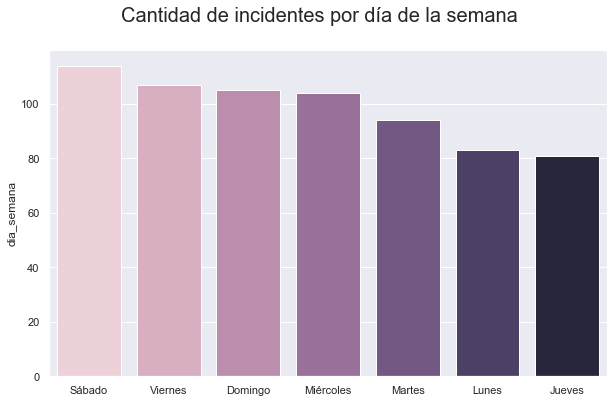

In [14]:
sns.set(font_scale = 1)
fig, axes = plt.subplots(1, 1, figsize=(10, 6), sharey=True)
fig.suptitle('Cantidad de incidentes por día de la semana', fontsize=20)
sns.barplot(x=incidentes.dia_semana.value_counts().index, y=incidentes.dia_semana.value_counts(), palette="ch:s=-.2")

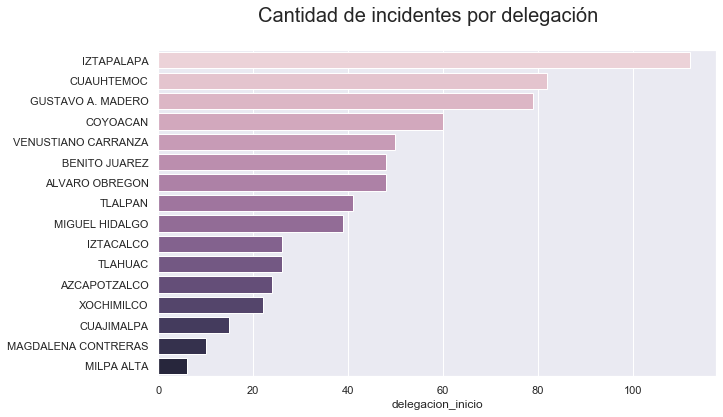

In [15]:
sns.set(font_scale = 1)
fig, axes = plt.subplots(1, 1, figsize=(10, 6), sharey=True)
fig.suptitle('Cantidad de incidentes por delegación', fontsize=20)
sns.barplot(x=incidentes.delegacion_inicio.value_counts(),y=incidentes.delegacion_inicio.value_counts().index, palette="ch:s=-.2")

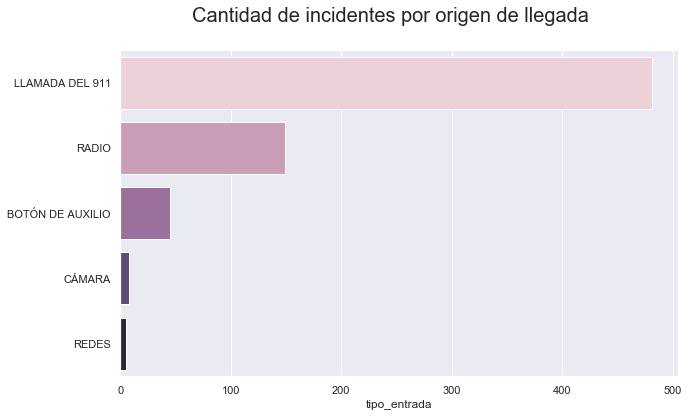

In [16]:
sns.set(font_scale = 1)
fig, axes = plt.subplots(1, 1, figsize=(10, 6), sharey=True)
fig.suptitle('Cantidad de incidentes por origen de llegada', fontsize=20)
sns.barplot(x=incidentes.tipo_entrada.value_counts(),y=incidentes.tipo_entrada.value_counts().index, palette="ch:s=-.2")

In [17]:
print(incidentes['ano'].unique())

[2021]


In [18]:
print(incidentes['mes'].unique())

[2]


In [19]:
print(incidentes['fecha_creacion'].unique())

['01/02/2021' '02/02/2021' '03/02/2021' '04/02/2021' '05/02/2021'
 '06/02/2021' '07/02/2021' '08/02/2021' '09/02/2021' '10/02/2021'
 '11/02/2021' '12/02/2021' '13/02/2021' '14/02/2021' '15/02/2021'
 '21/12/2020' '16/02/2021' '17/02/2021' '18/02/2021' '19/02/2021'
 '20/02/2021' '21/02/2021' '22/02/2021' '23/02/2021' '24/02/2021'
 '25/02/2021' '26/02/2021' '27/02/2021' '28/02/2021']


Se observa que hay datos para todos los días de la semana, todos los días del mes, todas las delegaciones de la CDMX, cinco tipos distintos de fuentes que reportaron el incidente. Sin embargo, la base solo contiene datos de 2021 y en específico, del mes de febrero, aún cuando en la [página](https://datos.cdmx.gob.mx/dataset/incidentes-viales-c5) se menciona que hay datos actualizados mensualmente desde 2014.

Dada esta circunstancia, el ejercicio se realizará únicamente para el mes de febrero de 2021. Si se tuvieran los datos de más años y de diferentes meses, el análisis se abordaría por año y por mes, sin embargo, se propone realizar el análisis por día para evaluar si hay alguna relación entre la ocurrencia de incidentes y el día de la semana en que tienen lugar.

###  Visualización espacial de los incidentes viales que involucran motos y bicis en el periodo de febrero de 2021


Se descargó un archivo .shp de la siguiente [página](https://datacatalog.worldbank.org/dataset/mexico-municipalities-2012) que contiene a México dividido por municipios. 

Se utilizó el paquete geopandas para visualizarlo.

In [20]:
import geopandas as gpd

In [21]:
mx = gpd.read_file('Muni_2012gw.shp')
mx.head()

![image](4.png)

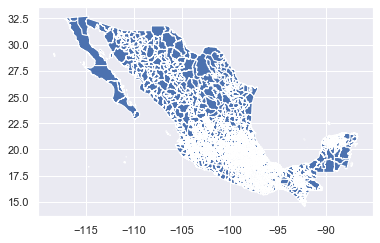

In [22]:
mx.plot()

Se puede observar el país entero, sin embargo la zona de interés es la CDMX, que se filtra usando 09 en la columna CVE_ENT:

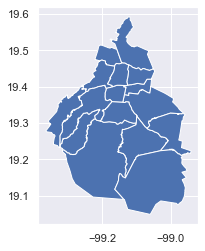

In [23]:
cdmx =  mx[(mx.CVE_ENT == '09')]
cdmx.plot()

Después, se graficó el total de incidentes ocurridos que involucran motocicletas y bicicletas por región en la CDMX.

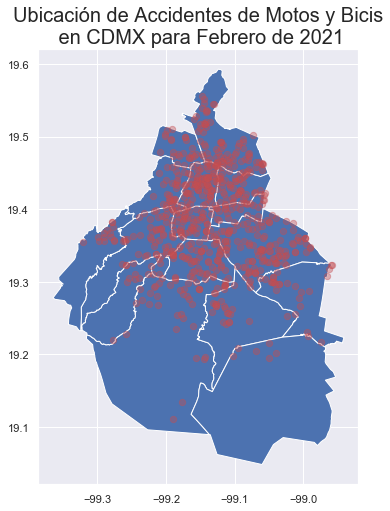

In [24]:
fig, ax = plt.subplots(figsize = (8,8)) 
x = incidentes['longitud'].values
y = incidentes['latitud'].values
plt.title('Ubicación de Accidentes de Motos y Bicis\n en CDMX para Febrero de 2021', fontsize=20)
cdmx.plot(ax=ax)
plt.scatter(x,y,c='r', s=40, alpha=0.4)

Podemos observar que la mayoría de los incidentes se concentran en la zona norte de la CDMX, sobre todo en las delegaciones del centro de la ciudad. 

En la carpeta de la Parte 2 pueden encontrarse dos animaciones de los incidentes por día en la CDMX: uno para los incidentes que involucran motos y otro para los de bicis.

## **Estimación de incidentes viales anuales que involucran motos y bicis en CDMX**

El ejercicio solicita la estimación del total anual, para cada año, de los incidentes de tránsito que involucran
motociclistas o ciclistas por cada 100 viajes **intradistrito** (dentro del distrito) en los que se utilizan estos modos de transporte. Sin embargo, con los datos utilizados no es posible saber si los viajes son intradistrito o no. Por ello, se hará solamente la estimación del total anual (para 2021 únicamente con datos de febrero) de incidentes que involucran motos o bicis por cada 100 viajes en la CDMX.

Para ello, se tienen tres enfoques distintos de cómo abordar el problema usando los datos disponibles.

###   Cálculo de accidentes diarios que involucran motociclistas y ciclistas

De la base de datos 'incidentes' se contabilizó el número de incidentes que involucran motociclistas. Se dividió el número de incidentes entre el número de días del mes de febrero, para sacar un promedio por día. Se hizo lo mismo para ciclistas.

In [25]:
incidentes.head()

![image](5.png)

In [26]:
inc_moto = incidentes[incidentes['incidente_c4'] == 'accidente-motociclista'].shape[0]/28
inc_bici = incidentes[incidentes['incidente_c4'] == 'accidente-ciclista'].shape[0]/28
print('Aproximadamente ocurren %.2f accidentes de moto al día en CDMX' % (inc_moto))
print('Aproximadamente ocurren %.2f accidentes de bici al día en CDMX' % (inc_bici))

Aproximadamente ocurren 21.57 accidentes de moto al día en CDMX
Aproximadamente ocurren 3.00 accidentes de bici al día en CDMX


Se tiene ya el número de incidentes viales que involucran motos y bicis al día. Asimismo, se calcularon la cantidad de viajes realizados que utilizan motos y bicis como medio de transporte por día. Con estos datos, puede calcularse el porcentaje de accidentes respecto a los viajes para cada medio de transporte por año.

In [27]:
inc_moto_ano = inc_moto * 365
inc_bici_ano = inc_bici * 365

viajes_moto_ano = viajes_moto * 365
viajes_bici_ano = viajes_bici * 365

In [28]:
por_moto_ano = (inc_moto_ano/viajes_moto_ano)*100
por_bici_ano = (inc_bici_ano/viajes_bici_ano)*100
print('El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran motociclistas por cada 100 viajes en los que se utiliza este modo de transporte es: %.4f '% por_moto_ano)

print('\nEl total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran ciclistas por cada 100 viajes en los que se utiliza este modo de transporte es: %.4f '% por_bici_ano)


El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran motociclistas por cada 100 viajes en los que se utiliza este modo de transporte es: 0.0144 

El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran ciclistas por cada 100 viajes en los que se utiliza este modo de transporte es: 0.0013 


El resultado obtenido indica que el total anual de incidentes que involucran motocicletas y bicicletas respecto al total de viajes que utilizan este medio de transporte por cada 100 viajes es de **0.0144 y 0.0013 respectivamente**.

### **Factores de conversión para cada trimestre**

En este enfoque, se utilizaron datos provenientes de los Reportes Trimestrales de Hechos de tránsito de la SEMOVI (trimestres [1](https://semovi.cdmx.gob.mx/storage/app/media/ReporteTrimestralHT_2019_01.pdf), [2](https://semovi.cdmx.gob.mx/storage/app/media/ReporteTrimestralHT_2019_02.pdf), [3](https://semovi.cdmx.gob.mx/storage/app/media/ReporteTrimestralHT_2019_03.pdf) y [4](https://semovi.cdmx.gob.mx/storage/app/media/ReporteTrimestralHT_2019_04.pdf)). Estos archivos contienen información de la cantidad de incidentes ocurridos en cada trimestre reportados para 2018 y 2019 por distintas fuentes. Para este enfoque, se eligió la información del C5 para mantener congruencia con el origen de la base de datos de incidentes.

La idea general de este enfoque es obtener factores de conversión para cada trimestre y aplicarlo a los datos existentes de incidentes de 2021 para generar datos para el resto del año. Con ello se busca tener una mayor robustez en el análisis para no asumir que todos los meses tienen el mismo comportamiento, dándole un peso a cada trimestre. Ya que los datos que se tienen corresponden al primer trimestre, los factores de conversión se calcularon utilizando este trimestre como base.

Se utilizó el promedio de 2018 y 2019 para los factores de conversión.

In [29]:
p1 = (18381+17949)/2
p2 = (18944+17317)/2
p3 = (18681+19345)/2
p4 = (19994+21219)/2

In [30]:
f1 = 1
f2 = p2/p1
f3 = p3/p1
f4 = p4/p1

In [31]:
trim1 = 31 + 28 + 31  #ene + feb + mar 
trim2 = 30 + 31 + 30  #abr + may + jun
trim3 = 31 + 31 + 30  #jul + ago + sep
trim4 = 31 + 30 + 31  #oct + nov + dic

In [32]:
inc_moto_ano_2 = inc_moto*(trim1*f1 + trim2*f2 + trim3*f3 + trim4*f4)
inc_bici_ano_2 = inc_bici*(trim1*f1 + trim2*f2 + trim3*f3 + trim4*f4)

In [33]:
por_moto_ano_2 = (inc_moto_ano_2/viajes_moto_ano)*100
por_bici_ano_2 = (inc_bici_ano_2/viajes_bici_ano)*100
print('El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran motociclistas por cada 100 viajes en los que se utiliza este modo de transporte es: %.4f '% por_moto_ano_2)

print('\nEl total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran ciclistas por cada 100 viajes en los que se utiliza este modo de transporte es: %.4f '% por_bici_ano_2)


El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran motociclistas por cada 100 viajes en los que se utiliza este modo de transporte es: 0.0150 

El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran ciclistas por cada 100 viajes en los que se utiliza este modo de transporte es: 0.0013 


Como puede observarse, el total anual para ambos tipos de transporte no varía mucho usando los factores de conversión respecto a los datos sin convertir.

### **Porcentaje de incidentes de motos y de bicis con respecto al total de incidentes**

En esta parte, se utilizó también la información de los Reportes Trimestrales de Hechos de tránsito de la SEMOVI 

La idea general de este enfoque es obtener el porcentaje de incidentes de motos y de bicis con respecto al total de incidentes de la base de incidentes viales, y a partir de estos porcentajes calcular el total anual utilizando la información del número de incidentes de los Reportes Trimestrales de Hechos de tránsito de la SEMOVI.

Al igual que en el enfoque anterior, se utilizó el promedio de 2018 y 2019.

In [34]:
incidentes_3 = pd.read_csv('incidentes_viales_reportados_por_c5.csv')
incidentes_3 = incidentes_3[incidentes_3['codigo_cierre'] == 'A']

prop_moto = incidentes_3[incidentes_3['incidente_c4'] == 'accidente-motociclista'].shape[0]/incidentes_3.shape[0]
prop_bici = incidentes_3[incidentes_3['incidente_c4'] == 'accidente-ciclista'].shape[0]/incidentes_3.shape[0]

In [35]:
inc_moto_ano_3 = prop_moto*(p1 + p2 + p3 + p4)
inc_bici_ano_3 = prop_bici*(p1 + p2 + p3 + p4)

In [36]:
por_moto_ano_3 = (inc_moto_ano_3/viajes_moto_ano)*100
por_bici_ano_3 = (inc_bici_ano_3/viajes_bici_ano)*100
print('El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran motociclistas por cada 100 viajes en los que se utiliza este modo de transporte es: %.4f '% por_moto_ano_3)

print('\nEl total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran ciclistas por cada 100 viajes en los que se utiliza este modo de transporte es: %.4f '% por_bici_ano_3)


El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran motociclistas por cada 100 viajes en los que se utiliza este modo de transporte es: 0.0185 

El total anual, para 2021 (basandonos solo en febrero), de los incidentes de tránsito que involucran ciclistas por cada 100 viajes en los que se utiliza este modo de transporte es: 0.0016 
